## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  42.350342  1019.605553  0.908332  7.654502  1.524282
1  11.450682   645.875028  0.739008  8.206067  1.371925
2  75.699488   617.011745  0.347913  1.302477  1.144631
3  45.719894  1696.529546  0.703013  1.748572  1.586972
4  22.508810  1234.322947  0.430250  7.602147  1.417906


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.80948 | train_mse: 4.95372 | train_mae: 1.62489 |  0:00:00s
epoch 1  | loss: 0.67047 | train_mse: 5.6355  | train_mae: 1.69205 |  0:00:00s


epoch 2  | loss: 0.68386 | train_mse: 12.03208| train_mae: 2.40977 |  0:00:00s
epoch 3  | loss: 0.64336 | train_mse: 14.69093| train_mae: 2.60997 |  0:00:00s
epoch 4  | loss: 0.37149 | train_mse: 13.36968| train_mae: 2.42074 |  0:00:01s


epoch 5  | loss: 0.45485 | train_mse: 8.07072 | train_mae: 1.80499 |  0:00:01s
epoch 6  | loss: 0.40903 | train_mse: 6.83194 | train_mae: 1.64726 |  0:00:01s


epoch 7  | loss: 0.40241 | train_mse: 4.76182 | train_mae: 1.34577 |  0:00:01s
epoch 8  | loss: 0.26467 | train_mse: 2.50692 | train_mae: 1.03255 |  0:00:01s


epoch 9  | loss: 0.21538 | train_mse: 2.19353 | train_mae: 0.9652  |  0:00:01s


epoch 10 | loss: 0.25921 | train_mse: 1.71318 | train_mae: 0.84978 |  0:00:01s


epoch 11 | loss: 0.15637 | train_mse: 1.27571 | train_mae: 0.73052 |  0:00:02s
epoch 12 | loss: 0.37748 | train_mse: 0.7346  | train_mae: 0.57129 |  0:00:02s


epoch 13 | loss: 0.134   | train_mse: 0.28374 | train_mae: 0.40737 |  0:00:02s
epoch 14 | loss: 0.30508 | train_mse: 0.28444 | train_mae: 0.38255 |  0:00:02s


epoch 15 | loss: 0.25975 | train_mse: 0.19043 | train_mae: 0.34967 |  0:00:02s
epoch 16 | loss: 0.17314 | train_mse: 0.36642 | train_mae: 0.42456 |  0:00:02s


epoch 17 | loss: 0.20139 | train_mse: 0.48836 | train_mae: 0.48961 |  0:00:02s
epoch 18 | loss: 0.19212 | train_mse: 0.39752 | train_mae: 0.45237 |  0:00:03s


epoch 19 | loss: 0.18216 | train_mse: 0.29745 | train_mae: 0.40548 |  0:00:03s
epoch 20 | loss: 0.14087 | train_mse: 0.22845 | train_mae: 0.36498 |  0:00:03s
epoch 21 | loss: 0.14595 | train_mse: 0.25373 | train_mae: 0.38086 |  0:00:03s


epoch 22 | loss: 0.16323 | train_mse: 0.31127 | train_mae: 0.40496 |  0:00:03s
epoch 23 | loss: 0.13382 | train_mse: 0.21386 | train_mae: 0.35611 |  0:00:03s
epoch 24 | loss: 0.21744 | train_mse: 0.14468 | train_mae: 0.2943  |  0:00:03s


epoch 25 | loss: 0.11748 | train_mse: 0.13036 | train_mae: 0.28616 |  0:00:03s
epoch 26 | loss: 0.13351 | train_mse: 0.14043 | train_mae: 0.28319 |  0:00:03s


epoch 27 | loss: 0.13919 | train_mse: 0.18813 | train_mae: 0.32381 |  0:00:03s
epoch 28 | loss: 0.23556 | train_mse: 0.19206 | train_mae: 0.32845 |  0:00:03s
epoch 29 | loss: 0.13776 | train_mse: 0.18784 | train_mae: 0.33035 |  0:00:04s


epoch 30 | loss: 0.19662 | train_mse: 0.15691 | train_mae: 0.30716 |  0:00:04s
epoch 31 | loss: 0.11535 | train_mse: 0.13883 | train_mae: 0.28649 |  0:00:04s
epoch 32 | loss: 0.19304 | train_mse: 0.13035 | train_mae: 0.27908 |  0:00:04s


epoch 33 | loss: 0.16747 | train_mse: 0.11969 | train_mae: 0.27363 |  0:00:04s
epoch 34 | loss: 0.17073 | train_mse: 0.15125 | train_mae: 0.29871 |  0:00:04s
epoch 35 | loss: 0.19235 | train_mse: 0.2302  | train_mae: 0.35046 |  0:00:04s


epoch 36 | loss: 0.1223  | train_mse: 0.252   | train_mae: 0.3664  |  0:00:04s
epoch 37 | loss: 0.16755 | train_mse: 0.23046 | train_mae: 0.35467 |  0:00:04s


epoch 38 | loss: 0.13683 | train_mse: 0.15654 | train_mae: 0.30744 |  0:00:04s
epoch 39 | loss: 0.11869 | train_mse: 0.11938 | train_mae: 0.27044 |  0:00:04s
epoch 40 | loss: 0.105   | train_mse: 0.10381 | train_mae: 0.25379 |  0:00:04s


epoch 41 | loss: 0.17223 | train_mse: 0.09722 | train_mae: 0.23376 |  0:00:05s
epoch 42 | loss: 0.10102 | train_mse: 0.09777 | train_mae: 0.23652 |  0:00:05s
epoch 43 | loss: 0.30894 | train_mse: 0.09611 | train_mae: 0.24145 |  0:00:05s


epoch 44 | loss: 0.15715 | train_mse: 0.09086 | train_mae: 0.23683 |  0:00:05s
epoch 45 | loss: 0.13039 | train_mse: 0.09575 | train_mae: 0.24405 |  0:00:05s
epoch 46 | loss: 0.13153 | train_mse: 0.09983 | train_mae: 0.25242 |  0:00:05s


epoch 47 | loss: 0.21394 | train_mse: 0.11132 | train_mae: 0.2685  |  0:00:05s
epoch 48 | loss: 0.17555 | train_mse: 0.1077  | train_mae: 0.26367 |  0:00:05s
epoch 49 | loss: 0.12421 | train_mse: 0.09657 | train_mae: 0.25102 |  0:00:05s


epoch 50 | loss: 0.10134 | train_mse: 0.09425 | train_mae: 0.25281 |  0:00:05s
epoch 51 | loss: 0.11636 | train_mse: 0.09408 | train_mae: 0.23648 |  0:00:05s
epoch 52 | loss: 0.10414 | train_mse: 0.1004  | train_mae: 0.23596 |  0:00:05s


epoch 53 | loss: 0.22173 | train_mse: 0.10938 | train_mae: 0.24974 |  0:00:06s
epoch 54 | loss: 0.12149 | train_mse: 0.10677 | train_mae: 0.24681 |  0:00:06s
epoch 55 | loss: 0.09066 | train_mse: 0.09939 | train_mae: 0.23925 |  0:00:06s


epoch 56 | loss: 0.16402 | train_mse: 0.11559 | train_mae: 0.25148 |  0:00:06s
epoch 57 | loss: 0.16809 | train_mse: 0.11005 | train_mae: 0.24416 |  0:00:06s
epoch 58 | loss: 0.11318 | train_mse: 0.10495 | train_mae: 0.23957 |  0:00:06s


epoch 59 | loss: 0.1015  | train_mse: 0.0984  | train_mae: 0.23503 |  0:00:06s
epoch 60 | loss: 0.16514 | train_mse: 0.08771 | train_mae: 0.22694 |  0:00:06s
epoch 61 | loss: 0.15545 | train_mse: 0.08404 | train_mae: 0.22141 |  0:00:06s


epoch 62 | loss: 0.1193  | train_mse: 0.09126 | train_mae: 0.23186 |  0:00:06s
epoch 63 | loss: 0.09551 | train_mse: 0.11999 | train_mae: 0.26055 |  0:00:06s
epoch 64 | loss: 0.13819 | train_mse: 0.13784 | train_mae: 0.27474 |  0:00:06s


epoch 65 | loss: 0.10597 | train_mse: 0.14771 | train_mae: 0.27492 |  0:00:06s
epoch 66 | loss: 0.09107 | train_mse: 0.16017 | train_mae: 0.2778  |  0:00:07s
epoch 67 | loss: 0.09948 | train_mse: 0.17301 | train_mae: 0.28081 |  0:00:07s


epoch 68 | loss: 0.10798 | train_mse: 0.21608 | train_mae: 0.31573 |  0:00:07s
epoch 69 | loss: 0.17679 | train_mse: 0.14443 | train_mae: 0.27919 |  0:00:07s
epoch 70 | loss: 0.23937 | train_mse: 0.14762 | train_mae: 0.28272 |  0:00:07s


epoch 71 | loss: 0.24773 | train_mse: 0.13792 | train_mae: 0.27915 |  0:00:07s
epoch 72 | loss: 0.10797 | train_mse: 0.14209 | train_mae: 0.26932 |  0:00:07s
epoch 73 | loss: 0.12468 | train_mse: 0.17078 | train_mae: 0.2778  |  0:00:07s


epoch 74 | loss: 0.10761 | train_mse: 0.19427 | train_mae: 0.28901 |  0:00:07s
epoch 75 | loss: 0.1138  | train_mse: 0.14164 | train_mae: 0.25659 |  0:00:07s
epoch 76 | loss: 0.09718 | train_mse: 0.10369 | train_mae: 0.23383 |  0:00:07s


epoch 77 | loss: 0.10452 | train_mse: 0.07939 | train_mae: 0.21746 |  0:00:07s
epoch 78 | loss: 0.11759 | train_mse: 0.09713 | train_mae: 0.2281  |  0:00:08s
epoch 79 | loss: 0.13041 | train_mse: 0.12707 | train_mae: 0.24937 |  0:00:08s


epoch 80 | loss: 0.0792  | train_mse: 0.20614 | train_mae: 0.2984  |  0:00:08s
epoch 81 | loss: 0.08487 | train_mse: 0.22893 | train_mae: 0.30527 |  0:00:08s
epoch 82 | loss: 0.1442  | train_mse: 0.21112 | train_mae: 0.30038 |  0:00:08s


epoch 83 | loss: 0.14313 | train_mse: 0.21035 | train_mae: 0.2987  |  0:00:08s
epoch 84 | loss: 0.10426 | train_mse: 0.21775 | train_mae: 0.30734 |  0:00:08s
epoch 85 | loss: 0.10666 | train_mse: 0.27579 | train_mae: 0.3491  |  0:00:08s


epoch 86 | loss: 0.2484  | train_mse: 0.32651 | train_mae: 0.37084 |  0:00:08s
epoch 87 | loss: 0.07438 | train_mse: 0.32583 | train_mae: 0.37505 |  0:00:08s
epoch 88 | loss: 0.20806 | train_mse: 0.34575 | train_mae: 0.38447 |  0:00:08s


epoch 89 | loss: 0.11976 | train_mse: 0.34876 | train_mae: 0.37496 |  0:00:08s
epoch 90 | loss: 0.16564 | train_mse: 0.28561 | train_mae: 0.35035 |  0:00:09s
epoch 91 | loss: 0.20315 | train_mse: 0.23593 | train_mae: 0.32644 |  0:00:09s


epoch 92 | loss: 0.10002 | train_mse: 0.19092 | train_mae: 0.3036  |  0:00:09s
epoch 93 | loss: 0.11089 | train_mse: 0.12448 | train_mae: 0.26359 |  0:00:09s
epoch 94 | loss: 0.22595 | train_mse: 0.09083 | train_mae: 0.2279  |  0:00:09s


epoch 95 | loss: 0.10956 | train_mse: 0.06909 | train_mae: 0.19593 |  0:00:09s
epoch 96 | loss: 0.17923 | train_mse: 0.09006 | train_mae: 0.21711 |  0:00:09s
epoch 97 | loss: 0.12066 | train_mse: 0.13168 | train_mae: 0.24943 |  0:00:09s


epoch 98 | loss: 0.12232 | train_mse: 0.12966 | train_mae: 0.23777 |  0:00:09s
epoch 99 | loss: 0.1164  | train_mse: 0.09047 | train_mae: 0.2088  |  0:00:09s
epoch 100| loss: 0.09677 | train_mse: 0.07362 | train_mae: 0.20033 |  0:00:09s


epoch 101| loss: 0.22379 | train_mse: 0.08649 | train_mae: 0.21778 |  0:00:09s
epoch 102| loss: 0.18137 | train_mse: 0.12091 | train_mae: 0.25468 |  0:00:10s
epoch 103| loss: 0.11567 | train_mse: 0.08801 | train_mae: 0.23783 |  0:00:10s


epoch 104| loss: 0.11241 | train_mse: 0.06847 | train_mae: 0.2109  |  0:00:10s
epoch 105| loss: 0.12997 | train_mse: 0.06284 | train_mae: 0.2001  |  0:00:10s
epoch 106| loss: 0.08532 | train_mse: 0.07547 | train_mae: 0.21375 |  0:00:10s


epoch 107| loss: 0.14194 | train_mse: 0.06399 | train_mae: 0.20077 |  0:00:10s
epoch 108| loss: 0.19109 | train_mse: 0.08796 | train_mae: 0.22641 |  0:00:10s
epoch 109| loss: 0.24132 | train_mse: 0.09945 | train_mae: 0.23837 |  0:00:10s


epoch 110| loss: 0.20953 | train_mse: 0.08733 | train_mae: 0.22583 |  0:00:10s
epoch 111| loss: 0.14753 | train_mse: 0.09028 | train_mae: 0.22825 |  0:00:10s
epoch 112| loss: 0.15349 | train_mse: 0.07914 | train_mae: 0.22019 |  0:00:10s


epoch 113| loss: 0.1011  | train_mse: 0.07404 | train_mae: 0.21354 |  0:00:10s
epoch 114| loss: 0.12458 | train_mse: 0.09194 | train_mae: 0.2312  |  0:00:11s
epoch 115| loss: 0.14836 | train_mse: 0.10623 | train_mae: 0.24926 |  0:00:11s


epoch 116| loss: 0.08014 | train_mse: 0.10796 | train_mae: 0.24875 |  0:00:11s
epoch 117| loss: 0.10691 | train_mse: 0.11478 | train_mae: 0.24966 |  0:00:11s
epoch 118| loss: 0.10608 | train_mse: 0.10028 | train_mae: 0.24251 |  0:00:11s


epoch 119| loss: 0.10317 | train_mse: 0.10648 | train_mae: 0.25062 |  0:00:11s
epoch 120| loss: 0.10663 | train_mse: 0.13295 | train_mae: 0.27556 |  0:00:11s
epoch 121| loss: 0.14116 | train_mse: 0.09106 | train_mae: 0.22945 |  0:00:11s


epoch 122| loss: 0.09587 | train_mse: 0.07008 | train_mae: 0.19983 |  0:00:11s
epoch 123| loss: 0.07161 | train_mse: 0.06413 | train_mae: 0.20234 |  0:00:11s
epoch 124| loss: 0.09735 | train_mse: 0.07285 | train_mae: 0.20925 |  0:00:11s


epoch 125| loss: 0.16609 | train_mse: 0.07897 | train_mae: 0.21395 |  0:00:12s
epoch 126| loss: 0.11162 | train_mse: 0.07791 | train_mae: 0.20946 |  0:00:12s
epoch 127| loss: 0.0694  | train_mse: 0.07873 | train_mae: 0.2156  |  0:00:12s


epoch 128| loss: 0.19536 | train_mse: 0.06141 | train_mae: 0.19747 |  0:00:12s
epoch 129| loss: 0.1271  | train_mse: 0.0596  | train_mae: 0.19236 |  0:00:12s


epoch 130| loss: 0.10365 | train_mse: 0.05551 | train_mae: 0.182   |  0:00:12s
epoch 131| loss: 0.09206 | train_mse: 0.07599 | train_mae: 0.20212 |  0:00:12s


epoch 132| loss: 0.0811  | train_mse: 0.09607 | train_mae: 0.22034 |  0:00:12s
epoch 133| loss: 0.36187 | train_mse: 0.13719 | train_mae: 0.25495 |  0:00:12s


epoch 134| loss: 0.0755  | train_mse: 0.12944 | train_mae: 0.25611 |  0:00:13s
epoch 135| loss: 0.1109  | train_mse: 0.08966 | train_mae: 0.22642 |  0:00:13s
epoch 136| loss: 0.16929 | train_mse: 0.0676  | train_mae: 0.20497 |  0:00:13s


epoch 137| loss: 0.13476 | train_mse: 0.06336 | train_mae: 0.20168 |  0:00:13s
epoch 138| loss: 0.09918 | train_mse: 0.06928 | train_mae: 0.2065  |  0:00:13s
epoch 139| loss: 0.09619 | train_mse: 0.09445 | train_mae: 0.23416 |  0:00:13s


epoch 140| loss: 0.13456 | train_mse: 0.07817 | train_mae: 0.21837 |  0:00:13s
epoch 141| loss: 0.10418 | train_mse: 0.06215 | train_mae: 0.20056 |  0:00:13s


epoch 142| loss: 0.10974 | train_mse: 0.06197 | train_mae: 0.19518 |  0:00:13s
epoch 143| loss: 0.08774 | train_mse: 0.07254 | train_mae: 0.20608 |  0:00:13s


epoch 144| loss: 0.09261 | train_mse: 0.09098 | train_mae: 0.22306 |  0:00:14s
epoch 145| loss: 0.12881 | train_mse: 0.08459 | train_mae: 0.21883 |  0:00:14s
epoch 146| loss: 0.0765  | train_mse: 0.10614 | train_mae: 0.23789 |  0:00:14s


epoch 147| loss: 0.13484 | train_mse: 0.14125 | train_mae: 0.2598  |  0:00:14s
epoch 148| loss: 0.11909 | train_mse: 0.16151 | train_mae: 0.26416 |  0:00:14s
epoch 149| loss: 0.13948 | train_mse: 0.14215 | train_mae: 0.25086 |  0:00:14s


epoch 150| loss: 0.12495 | train_mse: 0.11145 | train_mae: 0.24357 |  0:00:14s
epoch 151| loss: 0.07669 | train_mse: 0.11836 | train_mae: 0.25691 |  0:00:14s


epoch 152| loss: 0.10601 | train_mse: 0.07621 | train_mae: 0.21303 |  0:00:14s
epoch 153| loss: 0.05552 | train_mse: 0.06415 | train_mae: 0.19726 |  0:00:14s


epoch 154| loss: 0.10424 | train_mse: 0.06335 | train_mae: 0.19874 |  0:00:15s
epoch 155| loss: 0.07249 | train_mse: 0.08495 | train_mae: 0.2179  |  0:00:15s


epoch 156| loss: 0.17308 | train_mse: 0.09241 | train_mae: 0.2294  |  0:00:15s
epoch 157| loss: 0.07905 | train_mse: 0.08348 | train_mae: 0.22924 |  0:00:15s
epoch 158| loss: 0.15574 | train_mse: 0.07057 | train_mae: 0.20508 |  0:00:15s


epoch 159| loss: 0.09256 | train_mse: 0.08531 | train_mae: 0.2156  |  0:00:15s
epoch 160| loss: 0.14312 | train_mse: 0.09047 | train_mae: 0.2168  |  0:00:15s


epoch 161| loss: 0.09745 | train_mse: 0.12018 | train_mae: 0.23537 |  0:00:15s
epoch 162| loss: 0.10468 | train_mse: 0.08513 | train_mae: 0.21225 |  0:00:15s


epoch 163| loss: 0.1291  | train_mse: 0.04955 | train_mae: 0.18578 |  0:00:16s
epoch 164| loss: 0.12431 | train_mse: 0.05245 | train_mae: 0.19073 |  0:00:16s
epoch 165| loss: 0.12886 | train_mse: 0.05742 | train_mae: 0.19188 |  0:00:16s


epoch 166| loss: 0.0968  | train_mse: 0.06392 | train_mae: 0.19384 |  0:00:16s
epoch 167| loss: 0.10031 | train_mse: 0.06864 | train_mae: 0.19647 |  0:00:16s
epoch 168| loss: 0.06505 | train_mse: 0.07892 | train_mae: 0.20221 |  0:00:16s


epoch 169| loss: 0.10761 | train_mse: 0.05363 | train_mae: 0.16969 |  0:00:16s
epoch 170| loss: 0.14122 | train_mse: 0.04972 | train_mae: 0.17168 |  0:00:16s


epoch 171| loss: 0.08125 | train_mse: 0.04914 | train_mae: 0.17505 |  0:00:16s
epoch 172| loss: 0.12045 | train_mse: 0.05477 | train_mae: 0.18133 |  0:00:16s
epoch 173| loss: 0.11793 | train_mse: 0.05567 | train_mae: 0.18187 |  0:00:17s


epoch 174| loss: 0.08527 | train_mse: 0.0636  | train_mae: 0.19172 |  0:00:17s
epoch 175| loss: 0.07886 | train_mse: 0.05819 | train_mae: 0.18078 |  0:00:17s
epoch 176| loss: 0.08515 | train_mse: 0.05506 | train_mae: 0.17261 |  0:00:17s


epoch 177| loss: 0.23301 | train_mse: 0.06409 | train_mae: 0.18443 |  0:00:17s
epoch 178| loss: 0.06777 | train_mse: 0.07061 | train_mae: 0.19543 |  0:00:17s
epoch 179| loss: 0.12879 | train_mse: 0.0635  | train_mae: 0.18662 |  0:00:17s


epoch 180| loss: 0.07486 | train_mse: 0.05291 | train_mae: 0.17494 |  0:00:17s
epoch 181| loss: 0.12948 | train_mse: 0.04664 | train_mae: 0.16792 |  0:00:17s
epoch 182| loss: 0.15931 | train_mse: 0.05608 | train_mae: 0.17551 |  0:00:17s


epoch 183| loss: 0.13064 | train_mse: 0.05892 | train_mae: 0.17842 |  0:00:17s
epoch 184| loss: 0.12436 | train_mse: 0.07506 | train_mae: 0.18972 |  0:00:17s
epoch 185| loss: 0.10057 | train_mse: 0.07322 | train_mae: 0.18807 |  0:00:18s


epoch 186| loss: 0.09355 | train_mse: 0.0841  | train_mae: 0.19733 |  0:00:18s
epoch 187| loss: 0.06685 | train_mse: 0.07076 | train_mae: 0.19374 |  0:00:18s
epoch 188| loss: 0.08605 | train_mse: 0.07975 | train_mae: 0.21506 |  0:00:18s


epoch 189| loss: 0.17492 | train_mse: 0.09462 | train_mae: 0.22091 |  0:00:18s
epoch 190| loss: 0.07541 | train_mse: 0.05028 | train_mae: 0.16673 |  0:00:18s
epoch 191| loss: 0.0549  | train_mse: 0.05238 | train_mae: 0.16658 |  0:00:18s


epoch 192| loss: 0.13158 | train_mse: 0.07876 | train_mae: 0.20507 |  0:00:18s
epoch 193| loss: 0.14244 | train_mse: 0.08643 | train_mae: 0.23001 |  0:00:18s


epoch 194| loss: 0.11035 | train_mse: 0.07177 | train_mae: 0.21252 |  0:00:18s
epoch 195| loss: 0.12911 | train_mse: 0.06739 | train_mae: 0.20735 |  0:00:18s
epoch 196| loss: 0.11975 | train_mse: 0.06678 | train_mae: 0.20944 |  0:00:19s


epoch 197| loss: 0.08909 | train_mse: 0.06381 | train_mae: 0.20611 |  0:00:19s
epoch 198| loss: 0.07283 | train_mse: 0.07113 | train_mae: 0.2123  |  0:00:19s
epoch 199| loss: 0.09675 | train_mse: 0.07819 | train_mae: 0.20441 |  0:00:19s


epoch 200| loss: 0.21998 | train_mse: 0.0832  | train_mae: 0.20597 |  0:00:19s
epoch 201| loss: 0.15511 | train_mse: 0.07021 | train_mae: 0.20571 |  0:00:19s
epoch 202| loss: 0.16644 | train_mse: 0.05995 | train_mae: 0.19521 |  0:00:19s


epoch 203| loss: 0.13866 | train_mse: 0.05842 | train_mae: 0.18229 |  0:00:19s
epoch 204| loss: 0.13035 | train_mse: 0.07353 | train_mae: 0.18722 |  0:00:19s


epoch 205| loss: 0.19111 | train_mse: 0.0647  | train_mae: 0.17987 |  0:00:19s
epoch 206| loss: 0.13334 | train_mse: 0.04537 | train_mae: 0.16405 |  0:00:19s
epoch 207| loss: 0.06712 | train_mse: 0.0434  | train_mae: 0.15995 |  0:00:20s


epoch 208| loss: 0.11804 | train_mse: 0.04143 | train_mae: 0.15933 |  0:00:20s
epoch 209| loss: 0.09906 | train_mse: 0.03523 | train_mae: 0.14639 |  0:00:20s
epoch 210| loss: 0.07996 | train_mse: 0.04478 | train_mae: 0.16376 |  0:00:20s


epoch 211| loss: 0.10971 | train_mse: 0.06129 | train_mae: 0.1791  |  0:00:20s
epoch 212| loss: 0.129   | train_mse: 0.08066 | train_mae: 0.19969 |  0:00:20s
epoch 213| loss: 0.06501 | train_mse: 0.0997  | train_mae: 0.22726 |  0:00:20s


epoch 214| loss: 0.07135 | train_mse: 0.08846 | train_mae: 0.21707 |  0:00:20s
epoch 215| loss: 0.09635 | train_mse: 0.05667 | train_mae: 0.18251 |  0:00:20s
epoch 216| loss: 0.12085 | train_mse: 0.05246 | train_mae: 0.18054 |  0:00:20s


epoch 217| loss: 0.10167 | train_mse: 0.05517 | train_mae: 0.17511 |  0:00:20s
epoch 218| loss: 0.0775  | train_mse: 0.05124 | train_mae: 0.16463 |  0:00:21s
epoch 219| loss: 0.10433 | train_mse: 0.05376 | train_mae: 0.16702 |  0:00:21s


epoch 220| loss: 0.09007 | train_mse: 0.05274 | train_mae: 0.16554 |  0:00:21s
epoch 221| loss: 0.22933 | train_mse: 0.07267 | train_mae: 0.18547 |  0:00:21s
epoch 222| loss: 0.08873 | train_mse: 0.05545 | train_mae: 0.16846 |  0:00:21s


epoch 223| loss: 0.13445 | train_mse: 0.05877 | train_mae: 0.17592 |  0:00:21s
epoch 224| loss: 0.09171 | train_mse: 0.04393 | train_mae: 0.15846 |  0:00:21s
epoch 225| loss: 0.08013 | train_mse: 0.04433 | train_mae: 0.15977 |  0:00:21s


epoch 226| loss: 0.06897 | train_mse: 0.04306 | train_mae: 0.16424 |  0:00:21s
epoch 227| loss: 0.12471 | train_mse: 0.04476 | train_mae: 0.16563 |  0:00:21s
epoch 228| loss: 0.08367 | train_mse: 0.04639 | train_mae: 0.16956 |  0:00:21s


epoch 229| loss: 0.10357 | train_mse: 0.06399 | train_mae: 0.19523 |  0:00:21s
epoch 230| loss: 0.14572 | train_mse: 0.07304 | train_mae: 0.20444 |  0:00:22s
epoch 231| loss: 0.09305 | train_mse: 0.05526 | train_mae: 0.1869  |  0:00:22s


epoch 232| loss: 0.10248 | train_mse: 0.04748 | train_mae: 0.17819 |  0:00:22s
epoch 233| loss: 0.15491 | train_mse: 0.04649 | train_mae: 0.17887 |  0:00:22s
epoch 234| loss: 0.05222 | train_mse: 0.04465 | train_mae: 0.17135 |  0:00:22s


epoch 235| loss: 0.24309 | train_mse: 0.04365 | train_mae: 0.16494 |  0:00:22s
epoch 236| loss: 0.06674 | train_mse: 0.0491  | train_mae: 0.16659 |  0:00:22s
epoch 237| loss: 0.07326 | train_mse: 0.06476 | train_mae: 0.18319 |  0:00:22s


epoch 238| loss: 0.06024 | train_mse: 0.06038 | train_mae: 0.17395 |  0:00:22s
epoch 239| loss: 0.1286  | train_mse: 0.06833 | train_mae: 0.18606 |  0:00:22s
epoch 240| loss: 0.08438 | train_mse: 0.0593  | train_mae: 0.18046 |  0:00:22s


epoch 241| loss: 0.12352 | train_mse: 0.06165 | train_mae: 0.17629 |  0:00:22s
epoch 242| loss: 0.06742 | train_mse: 0.06875 | train_mae: 0.19437 |  0:00:23s
epoch 243| loss: 0.2725  | train_mse: 0.05054 | train_mae: 0.1696  |  0:00:23s


epoch 244| loss: 0.12455 | train_mse: 0.04172 | train_mae: 0.15324 |  0:00:23s
epoch 245| loss: 0.06173 | train_mse: 0.04224 | train_mae: 0.1609  |  0:00:23s
epoch 246| loss: 0.07942 | train_mse: 0.06269 | train_mae: 0.17381 |  0:00:23s


epoch 247| loss: 0.26682 | train_mse: 0.06153 | train_mae: 0.16954 |  0:00:23s
epoch 248| loss: 0.12178 | train_mse: 0.05987 | train_mae: 0.18183 |  0:00:23s
epoch 249| loss: 0.05361 | train_mse: 0.04642 | train_mae: 0.16663 |  0:00:23s


epoch 250| loss: 0.13341 | train_mse: 0.04133 | train_mae: 0.15907 |  0:00:23s


epoch 251| loss: 0.07777 | train_mse: 0.03876 | train_mae: 0.15761 |  0:00:24s
epoch 252| loss: 0.06984 | train_mse: 0.05779 | train_mae: 0.18052 |  0:00:24s
epoch 253| loss: 0.1426  | train_mse: 0.10942 | train_mae: 0.20958 |  0:00:24s


epoch 254| loss: 0.07674 | train_mse: 0.1348  | train_mae: 0.22061 |  0:00:24s
epoch 255| loss: 0.07803 | train_mse: 0.13707 | train_mae: 0.22435 |  0:00:24s
epoch 256| loss: 0.10042 | train_mse: 0.12985 | train_mae: 0.22919 |  0:00:24s


epoch 257| loss: 0.08269 | train_mse: 0.14559 | train_mae: 0.26042 |  0:00:24s
epoch 258| loss: 0.12576 | train_mse: 0.21807 | train_mae: 0.31425 |  0:00:24s


epoch 259| loss: 0.05854 | train_mse: 0.14335 | train_mae: 0.2548  |  0:00:24s

Early stopping occurred at epoch 259 with best_epoch = 209 and best_train_mae = 0.14639
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

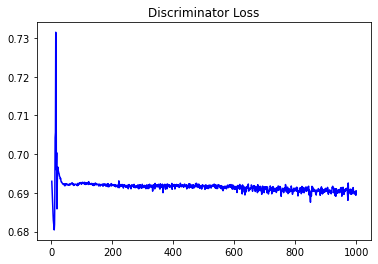

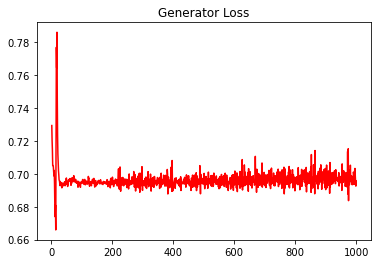

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.20631486260670986


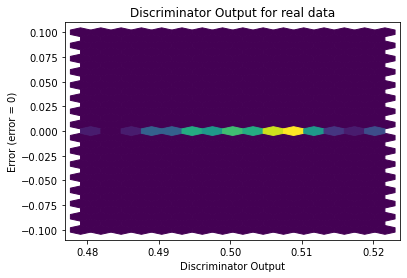

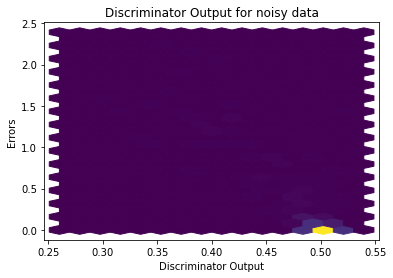

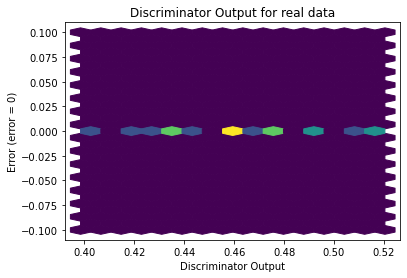

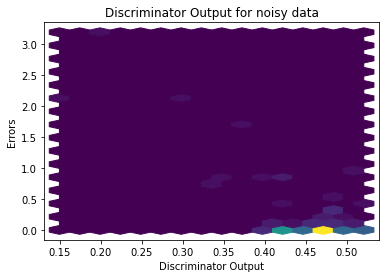

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


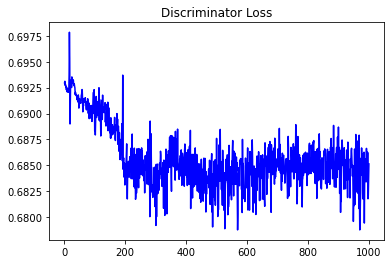

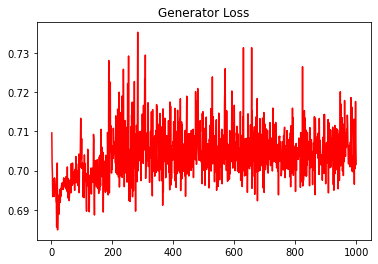

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20571205492501543


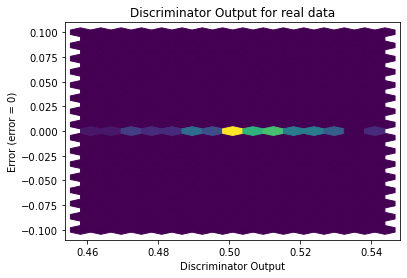

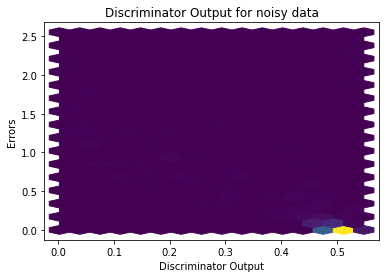

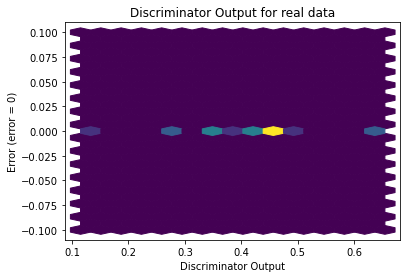

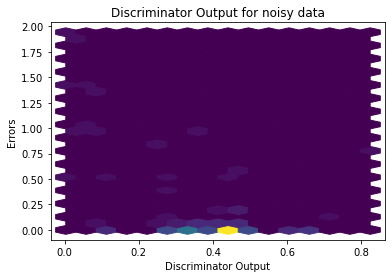

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1917]], requires_grad=True)
